# Analyze and Transform Financial Market Data with Pandas

In this chapter we'll cover the following recipes:
1. Diving into index types
2. Building Pandas series and DataFrames 
3. Manipulating and transforming DataFrames
4. Examining and Selecting Data from DataFrames
5. Calculating asset returns 
6. Measuring the volatility of a return series 
7. Resampling data from different time frames
8. Addressing missing data issues
9. Applying custom functions to analyse time series data

In [1]:
import pandas as pd

In [2]:
idx_1 = pd.Index([0,1,2,3,4,5,6,7,8,9])

In [3]:
idx_1 # as we can see this index is of type Int64Index, which means it's made up of 64-bit integers

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

Pandas has several Index types to support many use cases, including those related to time series analysis. We'll cover examples of the most often used index types

### DatatimeInndex

In [4]:
# extremly useful when dealing with time series data
days = pd.date_range("2016-01-01", periods=6, freq="D")
days # this creates an index with six incremental datetime objects

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [29]:
# we can use different frequencies, including seconds
seconds = pd.date_range("2016-01-01", periods=6, freq="s")
seconds

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05'],
              dtype='datetime64[ns]', freq='S')

In [6]:
# by default DatetimeIndexes are "timezone naive". To localize:
seconds_utc = seconds.tz_localize("UTC")
seconds_utc # as we can see, localizing simply appends time zone information to the object

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-01 00:00:01+00:00',
               '2016-01-01 00:00:02+00:00', '2016-01-01 00:00:03+00:00',
               '2016-01-01 00:00:04+00:00', '2016-01-01 00:00:05+00:00'],
              dtype='datetime64[ns, UTC]', freq='S')

### PeriodIndex

In [7]:
# it's possible to create ranges of periods -> such as quarters using period_range method
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

### MultiIndex

In [53]:
# often referred as "hierarchical index", is a data structure that allows for complex data organization within pandas dataframe and series.
# to create a MultiIndex object, pass a list of tuples to the from_tuples method 
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT")
]

midx = pd.MultiIndex.from_tuples(tuples, names=("date","symbol"))
midx

MultiIndex([('2023-07-10', 'WMT'),
            ('2023-07-10', 'JPM'),
            ('2023-07-10', 'TGT'),
            ('2023-07-11', 'WMT'),
            ('2023-07-11', 'JPM'),
            ('2023-07-11', 'TGT')],
           names=['date', 'symbol'])

In [54]:
# create DataFrame with MultiIndex
data = {"Price": [150, 100, 90, 155, 102, 92]}
df = pd.DataFrame(data, index=midx)
df

Price
date       symbol       
2023-07-10 WMT       150
           JPM       100
           TGT        90
2023-07-11 WMT       155
           JPM       102
           TGT        92

In [44]:
# more on multiindexes
'''
We have data for two stores (Store A and Store B) for two days (Day 1 and Day 2) and we want to record their sales. 
Using a MultiIndex, we can store this data in a Series:
'''

# Define the index (tuples with two levels: day and store)
index = [('Day 1', 'Store A'), ('Day 1', 'Store B'),
         ('Day 2', 'Store A'), ('Day 2', 'Store B')]

# Create a MultiIndex
multi_index = pd.MultiIndex.from_tuples(index, names=['Day', 'Store'])

# Define the sales data
sales_data = [100, 150, 200, 250]

# Create the Series with MultiIndex
sales = pd.Series(sales_data, index=multi_index)
print(sales)

Day    Store  
Day 1  Store A    100
       Store B    150
Day 2  Store A    200
       Store B    250
dtype: int64


In [51]:
# MultiIndex in a Dataframe
index = pd.MultiIndex.from_tuples(
    [('Day 1', 'Store A'), ('Day 1', 'Store B'),
     ('Day 2', 'Store A'), ('Day 2', 'Store B')],
    names=['Day', 'Store']
)

columns = ['Product 1', 'Product 2']
sales_data = [[10, 20], [15, 25], [20, 30], [25, 35]]

df = pd.DataFrame(sales_data, index=index, columns=columns)
df

Product 1  Product 2
Day   Store                        
Day 1 Store A         10         20
      Store B         15         25
Day 2 Store A         20         30
      Store B         25         35

In [49]:
# Accessing Data with MultiIndex
print(sales.loc['Day 1'])

# Accessing Data on Store B Day 2
print(sales.loc[('Day 2', 'Store B')])

Store
Store A    100
Store B    150
dtype: int64
250


In [52]:
# Accessing elements in a MultiIndex Dataframe
# Sales of all products for Day 1, Store A
print(df.loc[('Day 1', 'Store A')])

Product 1    10
Product 2    20
Name: (Day 1, Store A), dtype: int64


# Building pandas Series and DataFrames

In [9]:
# A series is a one-dimentional labeled array that can hold any data type, including integers, floats, strings and objects
# The axis labels of a Series are collectively referred to as Index -> allows for manipulation and easy access

A key feature of pandas series is its ability to handle missing data, represented as a NumPy nan (not a number).
 -> Unlike other values, nan doesn't equal anything, which is why we use functions such as numpy.isnan() to check for nan.

In [32]:
# how to construct a DataFrame out of several Series
import numpy as np
def rnd():
    return np.random.randn(6)

In [33]:
# creating three pandas series that we'll use to create df
s_1 = pd.Series(rnd(), index=seconds)
s_2 = pd.Series(rnd(), index=seconds)
s_3 = pd.Series(rnd(), index=seconds)

In [37]:
# creating a DataFrame using a Dictionary 
df = pd.DataFrame({"a": s_1, "b": s_2, "c": s_3})
df
# result is a DataFrame with a DatetimeIndex object of second resolution and three columns all with samples from a normal distribution

,a,b,c
2016-01-01 00:00:00,-0.702609,0.224508,-0.622859
2016-01-01 00:00:01,0.400119,-1.710678,0.166156
2016-01-01 00:00:02,-1.157357,-0.682956,-0.439438
2016-01-01 00:00:03,1.710172,-1.021789,-1.167827
2016-01-01 00:00:04,1.341819,0.628829,-0.066414
2016-01-01 00:00:05,1.001978,1.401021,-1.882693


In [17]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25,30,35]
}

index = ['ID_1', 'ID_2', 'ID_3']

s = pd.DataFrame(data, index=index)
s

,Name,Age
ID_1,Alice,25
ID_2,Bob,30
ID_3,Charlie,35


In [28]:
# Basic index operations [Sorting, Union, Intersection]

# sorting an index 
idx = pd.Index([3,4,1,2, 5])
sorted_idx = idx.sort_values()
print(sorted_idx)

# ex: Union and Intersection
idx_a = pd.Index([1,2,3])
idx_b = pd.Index([2,3,4])

union_idx = idx_a.union(idx_b)
print(f"Union: {union_idx}")

intesect_idx = idx_a.intersection(idx_b)
print(f"Intersection: {intesect_idx}")

Index([1, 2, 3, 4, 5], dtype='int64')
Union: Index([1, 2, 3, 4], dtype='int64')
Intersection: Index([2, 3], dtype='int64')


## Building a MultiIndex DataFrame from scratch

In [56]:
# we will use the same object that we've previously created
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT"),
]

midx = pd.MultiIndex.from_tuples(tuples, names=("date","symbol"))
midx

MultiIndex([('2023-07-10', 'WMT'),
            ('2023-07-10', 'JPM'),
            ('2023-07-10', 'TGT'),
            ('2023-07-11', 'WMT'),
            ('2023-07-11', 'JPM'),
            ('2023-07-11', 'TGT')],
           names=['date', 'symbol'])

In [59]:
# now that we have the index we can create dataframe
df_2 = pd.DataFrame(
    {
        "close": [158.11,144.64,132.55,158.20,146.61,134.86],
        "factor_1": [0.31, 0.24, 0.67, 0.29, 0.23, 0.71]
    }, index=midx
)

df_2

close  factor_1
date       symbol                  
2023-07-10 WMT     158.11      0.31
           JPM     144.64      0.24
           TGT     132.55      0.67
2023-07-11 WMT     158.20      0.29
           JPM     146.61      0.23
           TGT     134.86      0.71

### Reindexing an excisting dataframe with a MultiIndex object

In [60]:
'''
It’s common to add a MultiIndex object to a DataFrame. 
Let’s consider an example of reindexing options data for a MultiIndex object
'''

# import openbb platform 
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [61]:
chains = obb.derivatives.options.chains("SPY")

In [62]:
# DataFrame with SPY options data
chains

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,SPY,579.1,SPY241024C00300000,2024-10-24,0,300.0,call,8,27,279.0101,...,278.79,277.940002,1.670,0.006008,0.0000,1.0000,0.0000,-0.0001,0.0000,0.0000
1,SPY,579.1,SPY241024P00300000,2024-10-24,0,300.0,put,0,0,0.0001,...,0.00,0.005000,0.000,0.000000,7.2127,0.0000,0.0000,-0.0001,0.0000,0.0000
2,SPY,579.1,SPY241024C00305000,2024-10-24,0,305.0,call,0,0,274.0102,...,0.00,273.460007,0.000,0.000000,0.0000,1.0000,0.0000,-0.0002,0.0000,0.0000
3,SPY,579.1,SPY241024P00305000,2024-10-24,0,305.0,put,0,0,0.0002,...,0.00,0.005000,0.000,0.000000,7.0394,0.0000,0.0000,-0.0002,0.0000,0.0000
4,SPY,579.1,SPY241024C00310000,2024-10-24,0,310.0,call,0,0,269.0102,...,0.00,268.020004,0.000,0.000000,8.3494,1.0000,0.0000,-0.0002,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,SPY,579.1,SPY270115P00890000,2027-01-15,813,890.0,put,0,0,310.9900,...,0.00,312.024994,0.000,0.000000,0.0000,-1.0000,0.0000,-0.0780,0.0000,0.0001
8986,SPY,579.1,SPY270115C00895000,2027-01-15,813,895.0,call,6,0,1.0360,...,0.00,0.980000,0.000,0.000000,0.1204,0.0292,0.0006,-0.0039,0.6395,0.3452
8987,SPY,579.1,SPY270115P00895000,2027-01-15,813,895.0,put,0,0,315.9900,...,0.00,317.024994,0.000,0.000000,0.0000,-1.0000,0.0000,-0.0780,0.0000,0.0001
8988,SPY,579.1,SPY270115C00900000,2027-01-15,813,900.0,call,939,1,0.9728,...,1.00,1.045000,-0.045,-0.043062,0.1234,0.0276,0.0006,-0.0037,0.6116,0.3257


Options are derivatives that are often grouped by expiration date, stike price, option type and any combination of those three.

-> Using the set_index method takes the arguments in the list and uses those columns as indexes, converting RangeIndex into a MultiIndex object. In this example, we use the expiration date, strike price, and option type as the three indexes.

In [64]:
df_3 = chains.set_index(["expiration", "strike", "option_type"])
df_3

underlying_symbol  underlying_price  \
expiration strike option_type                                       
2024-10-24 300.0  call                      SPY             579.1   
                  put                       SPY             579.1   
           305.0  call                      SPY             579.1   
                  put                       SPY             579.1   
           310.0  call                      SPY             579.1   
...                                         ...               ...   
2027-01-15 890.0  put                       SPY             579.1   
           895.0  call                      SPY             579.1   
                  put                       SPY             579.1   
           900.0  call                      SPY             579.1   
                  put                       SPY             579.1   

                                  contract_symbol  dte  open_interest  volume  \
expiration strike option_type                                                   
2024-10-24 300.0  call         SPY241024C00300000    0              8      27   
                  put          SPY241024P00300000    0              0       0   
           305.0  call         SPY241024C00305000    0              0       0   
                  put          SPY241024P00305000    0              0       0   
           310.0  call         SPY241024C00310000    0              0       0   
...                                           ...  ...            ...     ...   
2027-01-15 890.0  put          SPY270115P00890000  813              0       0   
           895.0  call         SPY270115C00895000  813              6       0   
                  put          SPY270115P00895000  813              0       0   
           900.0  call         SPY270115C00900000  813            939       1   
                  put          SPY270115P00900000  813              0       0   

                               theoretical_price  last_trade_price  \
expiration strike option_type                                        
2024-10-24 300.0  call                  279.0101            279.61   
                  put                     0.0001              0.00   
           305.0  call                  274.0102              0.00   
                  put                     0.0002              0.00   
           310.0  call                  269.0102              0.00   
...                                          ...               ...   
2027-01-15 890.0  put                   310.9900              0.00   
           895.0  call                    1.0360              1.28   
                  put                   315.9900              0.00   
           900.0  call                    0.9728              1.00   
                  put                   320.9900            320.70   

                                  last_trade_time       tick  ...     low  \
expiration strike option_type                                 ...           
2024-10-24 300.0  call        2024-10-24 09:30:15         up  ...  278.79   
                  put                         NaT  no_change  ...    0.00   
           305.0  call                        NaT  no_change  ...    0.00   
                  put                         NaT  no_change  ...    0.00   
           310.0  call                        NaT  no_change  ...    0.00   
...                                           ...        ...  ...     ...   
2027-01-15 890.0  put                         NaT  no_change  ...    0.00   
           895.0  call        2024-10-18 14:17:38       down  ...    0.00   
                  put                         NaT  no_change  ...    0.00   
           900.0  call        2024-10-24 09:30:09         up  ...    1.00   
                  put         2024-10-15 15:31:21         up  ...    0.00   

                               prev_close  change  change_percent  \
expiration strike option_type                                       
2024-10-24 300.0  call     

In [65]:
df_3.index

MultiIndex([(2024-10-24, 300.0, 'call'),
            (2024-10-24, 300.0,  'put'),
            (2024-10-24, 305.0, 'call'),
            (2024-10-24, 305.0,  'put'),
            (2024-10-24, 310.0, 'call'),
            (2024-10-24, 310.0,  'put'),
            (2024-10-24, 315.0, 'call'),
            (2024-10-24, 315.0,  'put'),
            (2024-10-24, 320.0, 'call'),
            (2024-10-24, 320.0,  'put'),
            ...
            (2027-01-15, 880.0, 'call'),
            (2027-01-15, 880.0,  'put'),
            (2027-01-15, 885.0, 'call'),
            (2027-01-15, 885.0,  'put'),
            (2027-01-15, 890.0, 'call'),
            (2027-01-15, 890.0,  'put'),
            (2027-01-15, 895.0, 'call'),
            (2027-01-15, 895.0,  'put'),
            (2027-01-15, 900.0, 'call'),
            (2027-01-15, 900.0,  'put')],
           names=['expiration', 'strike', 'option_type'], length=8990)

# Manipulating and Transforming DataFrames

Topics:
- Creating new columns using aggregates, Booleans and Strings 
- Concatenating two DataFrames together 
- Pivoting a DataFrame such Excel
- Grouping data on a key or index and applying and aggregate
- Joining options data together to create a straddle prices

In [8]:
import numpy as np 
import pandas as pd 
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [9]:
asset = obb.equity.price.historical("AAPL")
benchmark = obb.equity.price.historical("SPY")

In [10]:
print(asset.head())
print(benchmark.head())

            open  high   low  close      volume
date                                           
2004-01-02  0.39  0.39  0.38   0.38  2024993600
2004-01-05  0.38  0.40  0.38   0.40  5530257600
2004-01-06  0.40  0.40  0.39   0.40  7130872000
2004-01-07  0.40  0.41  0.39   0.41  8216241600
2004-01-08  0.41  0.42  0.41   0.42  6444244800
              open    high     low   close    volume
date                                                
2004-01-02  111.74  112.19  110.73  111.23  38072300
2004-01-05  111.69  112.52  111.59  112.44  27959800
2004-01-06  112.16  112.73  112.00  112.55  20472800
2004-01-07  112.39  113.06  111.89  112.93  30170400
2004-01-08  113.25  113.41  112.77  113.38  36438400


In [11]:
columns = [
    "open",
    "high",
    "low",
    "close",
    "volume"
]

asset.columns = columns
benchmark.columns = columns

In [12]:
# Add new columns with value from aggregate
asset["price_diff"] = asset.close.diff()
benchmark["price_diff"] = benchmark.close.diff()

In [13]:
# Adding new columns with a boolean
asset["gain"] = asset.price_diff > 0
benchmark["gain"] = benchmark.price_diff > 0

In [14]:
# Adding new column with a string value
asset["ticker"] = "AAPL"
benchmark["ticker"] = "SPY"

In [15]:
# Results of adding new columns to both dataframes
asset.head()

,open,high,low,close,volume,price_diff,gain,ticker
date,,,,,,,,
2004-01-02,0.39,0.39,0.38,0.38,2024993600,NaN,False,AAPL
2004-01-05,0.38,0.40,0.38,0.40,5530257600,0.02,True,AAPL
2004-01-06,0.40,0.40,0.39,0.40,7130872000,0.00,False,AAPL
2004-01-07,0.40,0.41,0.39,0.41,8216241600,0.01,True,AAPL
2004-01-08,0.41,0.42,0.41,0.42,6444244800,0.01,True,AAPL


In [16]:
benchmark.head()

,open,high,low,close,volume,price_diff,gain,ticker
date,,,,,,,,
2004-01-02,111.74,112.19,110.73,111.23,38072300,NaN,False,SPY
2004-01-05,111.69,112.52,111.59,112.44,27959800,1.21,True,SPY
2004-01-06,112.16,112.73,112.00,112.55,20472800,0.11,True,SPY
2004-01-07,112.39,113.06,111.89,112.93,30170400,0.38,True,SPY
2004-01-08,113.25,113.41,112.77,113.38,36438400,0.45,True,SPY


In [17]:
# Set a single value based on aggregate of values
asset_2 = asset.copy()
asset_2.at[
    asset_2.index[10],
    "volume"
] = asset_2.volume.mean()

/var/folders/zw/4sk33jrx1zs31dzjqtgyrm1c0000gn/T/ipykernel_79194/659863853.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '961840412.3066946' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  asset_2.at[


In [18]:
asset_2.iat[10,4]

961840412.3066946

## Concatenating two Dataframes together

In [19]:
pd.concat([asset, asset_2]).drop_duplicates()

,open,high,low,close,volume,price_diff,gain,ticker
date,,,,,,,,
2004-01-02,0.39,0.39,0.38,0.38,2.024994e+09,NaN,False,AAPL
2004-01-05,0.38,0.40,0.38,0.40,5.530258e+09,0.02,True,AAPL
2004-01-06,0.40,0.40,0.39,0.40,7.130872e+09,0.00,False,AAPL
2004-01-07,0.40,0.41,0.39,0.41,8.216242e+09,0.01,True,AAPL
2004-01-08,0.41,0.42,0.41,0.42,6.444245e+09,0.01,True,AAPL
...,...,...,...,...,...,...,...,...
2024-10-22,233.95,236.22,232.60,235.86,3.884658e+07,-0.62,False,AAPL
2024-10-23,234.10,235.14,227.76,230.76,5.228698e+07,-5.10,False,AAPL
2024-10-24,229.98,230.82,228.41,230.57,3.110950e+07,-0.19,False,AAPL


## Pivoting a df such as Excel

In [20]:
pd.pivot_table(
    data=asset,
    values="price_diff",
    columns="gain",
    aggfunc=["sum","mean", "std"]
) # the result is a pivoted dataframe with MultiIndex column labels

sum               mean                 std          
gain          False    True      False     True      False     True 
price_diff -1542.21  1773.24 -0.603133  0.660425  1.182803  1.196318

## Grouping data on a key or index and applying an aggregate

In [21]:
concated = pd.concat([asset, benchmark])

In [23]:
concated.describe()

,open,high,low,close,volume,price_diff
count,10488.000000,10488.000000,10488.000000,10488.000000,1.048800e+04,10486.000000
mean,137.815767,138.707059,136.873291,137.842341,5.416091e+08,0.066645
std,131.284186,131.964331,130.535992,131.303439,1.840694e+09,2.154370
min,0.380000,0.390000,0.380000,0.380000,0.000000e+00,-29.470000
25%,23.450000,23.655000,23.167500,23.430000,7.040313e+07,-0.350000
50%,121.080000,121.865000,120.185000,121.130000,1.260106e+08,0.020000
75%,196.187500,197.240000,195.102500,196.302500,3.205220e+08,0.560000
max,585.970000,586.120000,582.580000,584.590000,4.430604e+10,21.210000


In [24]:
# group the resulting df by ticker 
concated.groupby("ticker").close.ohlc()

,open,high,low,close
ticker,,,,
AAPL,0.38,236.48,0.38,231.41
SPY,111.23,584.59,68.11,579.04


## Joining options data together to create straddle prices

In [25]:
# DataFrame joints are similar to sql joints. It combines two dataframes on a matching key
chains = obb.derivatives.options.chains(
    "AAPL", provider="cboe"
)
chains.head()

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,AAPL,232.61,AAPL241101C00100000,2024-11-01,4,100.0,call,3,2,133.6128,...,133.5,131.599998,1.9,0.014438,2.9271,1.0000,0.0,0.0000,0.0001,0.0191
1,AAPL,232.61,AAPL241101P00100000,2024-11-01,4,100.0,put,3,0,0.0008,...,0.0,0.005000,0.0,0.000000,2.4698,-0.0001,0.0,-0.0007,0.0001,0.0000
2,AAPL,232.61,AAPL241101C00105000,2024-11-01,4,105.0,call,5,0,128.6179,...,0.0,126.600002,0.0,0.000000,2.4182,1.0000,0.0,0.0000,0.0001,0.0200
3,AAPL,232.61,AAPL241101P00105000,2024-11-01,4,105.0,put,0,0,0.0009,...,0.0,0.040000,0.0,0.000000,3.1292,-0.0001,0.0,-0.0008,0.0001,0.0000
4,AAPL,232.61,AAPL241101C00110000,2024-11-01,4,110.0,call,0,0,123.6229,...,0.0,121.600002,0.0,0.000000,2.5413,0.9999,0.0,0.0000,0.0001,0.0210


In [26]:
# in order to construct a straddle we need to filter out the calls and put for especific expiration
expirations = chains.expiration.unique()
calls = chains[
    (chains.option_type == "call") & (chains.expiration == expirations[5])
]

puts = chains[
    (chains.option_type == "put") & (chains.expiration == expirations[5])
]

In [27]:
calls_strike = calls.set_index("strike")
puts_strike = puts.set_index("strike")

In [29]:
joined = calls_strike.join(
    puts_strike,
    how="left",
    lsuffix="_call",
    rsuffix="_put"
)

In [30]:
# we need only the price columns from joined DataFrame
prices = joined[["last_trade_price_call",
                "last_trade_price_put"]]

In [31]:
# sum up the call and put prices by using the axis argument in the sum method
prices["straddle_price"] = prices.sum(axis=1)
prices.head()

/var/folders/zw/4sk33jrx1zs31dzjqtgyrm1c0000gn/T/ipykernel_79194/3402307633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["straddle_price"] = prices.sum(axis=1)


,last_trade_price_call,last_trade_price_put,straddle_price
strike,,,
100.0,0.0,0.0,0.0
105.0,0.0,0.0,0.0
110.0,0.0,0.0,0.0
115.0,0.0,0.0,0.0
120.0,0.0,0.0,0.0


## Grouping by multiple columns

In [32]:
# Option chains grouped by option type, strike, and expiration with the openInterest aggregate
(
chains
    .groupby(
        ["option_type", "strike", "expiration"]
    )
    .open_interest
    .sum()
)

option_type  strike  expiration
call         5.0     2024-11-15      0
                     2024-12-20     13
                     2025-01-17     15
                     2025-03-21      2
                     2025-06-20    870
                                  ... 
put          430.0   2027-01-15      0
             440.0   2026-12-18      0
                     2027-01-15      0
             450.0   2026-12-18      0
                     2027-01-15      0
Name: open_interest, Length: 2220, dtype: int64

## Applying different methods to different columns

In [34]:
(
chains
    .groupby(
        ["option_type", "strike", "expiration"]
) .agg({
        "last_trade_price": "max",
        "open_interest": "sum"
    })
) #It offers a snapshot of the highest option price and total open interest for the call and put options

last_trade_price  open_interest
option_type strike expiration                                 
call        5.0    2024-11-15              0.00              0
                   2024-12-20            225.15             13
                   2025-01-17            227.00             15
                   2025-03-21            223.44              2
                   2025-06-20            222.60            870
...                                         ...            ...
put         430.0  2027-01-15            192.90              0
            440.0  2026-12-18              0.00              0
                   2027-01-15            208.49              0
            450.0  2026-12-18            221.25              0
                   2027-01-15              0.00              0

[2220 rows x 2 columns]

## Applying custom functions

In [38]:
# if we want to use our own function we can use apply method
# Calculate the average spread
chains.groupby(["option_type"]).apply(lambda x: (x["ask"] - x["bid"]).mean())

# here I calculate the average spread 

option_type
call    1.731694
put     1.163243
dtype: float64

In [40]:
# creating a standardized price within each expiration 
chains.groupby(["expiration"]).last_trade_price.transform(lambda x: (x-x.mean()) / x.std())

0       3.798257
1      -0.576349
2       3.511817
3      -0.577004
4      -0.577004
          ...   
2215    2.316042
2216   -0.678953
2217    2.561131
2218   -0.682883
2219   -0.716526
Name: last_trade_price, Length: 2220, dtype: float64

## Examining and selecting data

In [4]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [47]:
# MOST PROBABLY YFINANCE API KEY NEEDS TO BE PROVIDED VIA OPENBB PLATFORM CLI TERMINAL -> TO BE DONE!
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

OpenBBError: 
[Error] -> Unexpected error.

In [5]:
from openbb import obb
df = obb.equity.price.historical("AAPL", start_date="2021-01-01")

In [6]:
df.values

array([[1.3356000e+02, 1.3361000e+02, 1.2676000e+02, 1.2941000e+02,
        6.5976291e+07],
       [1.2898000e+02, 1.3174000e+02, 1.2843000e+02, 1.3101000e+02,
        4.4688693e+07],
       [1.2753000e+02, 1.3105000e+02, 1.2638000e+02, 1.2660000e+02,
        7.6656086e+07],
       ...,
       [2.2998000e+02, 2.3082000e+02, 2.2841000e+02, 2.3057000e+02,
        3.1109503e+07],
       [2.2974000e+02, 2.3322000e+02, 2.2957000e+02, 2.3141000e+02,
        3.8802304e+07],
       [2.3326000e+02, 2.3473000e+02, 2.3255000e+02, 2.3340000e+02,
        3.6087134e+07]])

In [7]:
df.describe()

,open,high,low,close,volume
count,964.000000,964.000000,964.000000,964.000000,9.640000e+02
mean,165.700944,167.458506,164.060768,165.842116,5.654572e+07
std,27.560708,27.623477,27.452404,27.565290,2.490560e+07
min,119.100000,120.400000,116.210000,116.360000,1.863765e+07
25%,144.997500,146.862500,143.485000,145.485000,4.101656e+07
50%,164.555000,166.320000,162.875000,164.960000,5.149536e+07
75%,182.055000,183.097500,180.202500,181.930000,6.679388e+07
max,236.400000,237.490000,234.450000,236.480000,3.186799e+08


In [10]:
df.head(5)

,open,high,low,close,volume
date,,,,,
2021-01-04,133.56,133.61,126.76,129.41,65976291
2021-01-05,128.98,131.74,128.43,131.01,44688693
2021-01-06,127.53,131.05,126.38,126.60,76656086
2021-01-07,128.38,131.63,127.86,130.92,52567607
2021-01-08,132.50,132.63,130.23,132.05,51219816


## Selection by label using loc

In [9]:

# we use loc when we want to select data basen on label-based indexing
# selecting a single row transposes the Series and puts the DataFrame columns as row labels
df.loc[df.index[0]]

open           133.56
high           133.61
low            126.76
close          129.41
volume    65976291.00
Name: 2021-01-04, dtype: float64

In [11]:
df.index[0]

datetime.date(2021, 1, 4)

In [12]:
# selecting a single row and single column returns a scalar
df.loc[df.index[0], "close"]

129.41

In [13]:
# selecting a range of rows and a list of columns returns a subsection of the data
df.loc[df.index[0:6], ["high", "low"]]

,high,low
date,,
2021-01-04,133.61,126.76
2021-01-05,131.74,128.43
2021-01-06,131.05,126.38
2021-01-07,131.63,127.86
2021-01-08,132.63,130.23
2021-01-11,130.17,128.50


## Selection by position using iloc

In [17]:
df.iloc[3]

open           128.38
high           131.63
low            127.86
close          130.92
volume    52567607.00
Name: 2021-01-07, dtype: float64

In [18]:
# selecting a range of rows by index and a range of columns by index returns a subset of the data
df.iloc[3:5, 0:2]

,open,high
date,,
2021-01-07,128.38,131.63
2021-01-08,132.50,132.63


In [19]:
# selecting a combination of specific rows and columns by index works too
df.iloc[[1,2,4], [0,2]]

,open,low
date,,
2021-01-05,128.98,128.43
2021-01-06,127.53,126.38
2021-01-08,132.50,130.23


## Selection by Boolean indexing

In [20]:
# this is one of the ways to inspect where a condition is True for each row
df.close > df.close.mean()

date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08    False
              ...  
2024-10-22     True
2024-10-23     True
2024-10-24     True
2024-10-25     True
2024-10-28     True
Name: close, Length: 964, dtype: bool

In [21]:
# now we can proceed
df[df.close > df.close.mean()]

,open,high,low,close,volume
date,,,,,
2021-12-07,169.10,171.58,168.34,171.18,52466872
2021-12-08,172.00,175.95,170.70,175.08,59202498
2021-12-09,174.84,176.75,173.92,174.56,53605672
2021-12-10,175.14,179.63,174.70,179.45,54384439
2021-12-13,181.00,182.09,175.53,175.74,70441932
...,...,...,...,...,...
2024-10-22,233.95,236.22,232.60,235.86,38846578
2024-10-23,234.10,235.14,227.76,230.76,52286979
2024-10-24,229.98,230.82,228.41,230.57,31109503


In [22]:
# Using the result to return all the rows and the data at column index location 0
df[df.close > df.close.mean()].iloc[:, 0]

date
2021-12-07    169.10
2021-12-08    172.00
2021-12-09    174.84
2021-12-10    175.14
2021-12-13    181.00
               ...  
2024-10-22    233.95
2024-10-23    234.10
2024-10-24    229.98
2024-10-25    229.74
2024-10-28    233.26
Name: open, Length: 464, dtype: float64

In [35]:
# using label-based indexing with Boolean indexing to create query-like slicing
df.loc[
    (df.close > df.close.mean())
    & (df.close.mean() > 100)
    & (df.volume > df.volume.mean())
]

,open,high,low,close,volume
date,,,,,
2021-12-08,172.00,175.95,170.70,175.08,59202498.0
2021-12-13,181.00,182.09,175.53,175.74,70441932.0
2021-12-14,175.30,177.72,172.21,174.33,56897831.0
2021-12-15,175.16,179.50,172.31,179.30,60662928.0
2021-12-16,179.15,181.14,170.75,172.26,71278251.0
...,...,...,...,...,...
2024-09-18,217.59,222.71,217.54,220.69,59894928.0
2024-09-19,225.05,229.82,224.63,228.87,66781315.0
2024-09-20,229.90,233.09,227.62,228.20,318679888.0


In [37]:
# pandas provides handy methods to get rows with the smallest or largest values in a colum
df.nlargest(5, "volume") # 2nd is nsmallest

,open,high,low,close,volume
date,,,,,
2024-09-20,229.90,233.09,227.62,228.20,318679888.0
2024-06-21,210.39,211.89,207.11,207.49,246421353.0
2024-06-12,207.40,220.20,206.90,213.07,198134293.0
2024-06-11,193.70,207.16,193.63,207.15,172373296.0
2022-10-28,148.20,157.50,147.82,155.74,164762371.0


In [39]:
# using the query method to query DataFrames
# in order to get all rows where the close price is higher than the open price we can do the following
df.query("close > open").head()

,open,high,low,close,volume
date,,,,,
2021-01-05,128.98,131.74,128.43,131.01,44688693.0
2021-01-07,128.38,131.63,127.86,130.92,52567607.0
2021-01-12,128.48,129.69,126.86,128.80,45655434.0
2021-01-13,128.62,131.45,128.49,130.89,42628020.0
2021-01-19,127.72,128.71,126.94,127.83,43449692.0


# Calculating asset returns using pandas

Quick Revision:

Simple returns - calculated as a difference in price from one period to the next divided by
the price at the beggining. They aggregate across assets, meaning the simple return of a portfolio
is the aggregate of the retuns of the individual assets weighted according to their proportions.

Simple returns formula: $$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$$

Compound returns - are calculated using the natural logarithm of the price-relative change, are additive over time. This makes them suitable for multi-period analyses as the compound return for the period is the sum of the log returns within that period.

Compound returns formula: $$r_t = \log \left( \frac{P_t}{P_{t-1}} \right) = \log(P_t) - \log(P_{t-1})
$$

In [1]:
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [2]:
data = obb.equity.price.historical("AAPL")

In [3]:
df = data.loc[:,["close"]]

In [4]:
# now we add column with simple and compound returns
df["simple"] = df["close"].pct_change()
df["compound"] = np.log(df["close"] / df["close"].shift())

In [5]:
df.head()

,close,simple,compound
date,,,
2004-01-02,0.38,NaN,NaN
2004-01-05,0.40,0.052632,0.051293
2004-01-06,0.40,0.000000,0.000000
2004-01-07,0.41,0.025000,0.024693
2004-01-08,0.42,0.024390,0.024098


In [7]:
# pct_change method accepts "periods" argument that will shift the input data by that number before computing the simple return.
# this may be useful when we were to calculate returns that are multiple periods
df["close"].pct_change(periods = 3).head()

date
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07    0.078947
2004-01-08    0.050000
Name: close, dtype: float64

In [8]:
# we can achieve sth similar providing "shift" with explicit argument -> in our example 3
np.log(df["close"] / df["close"].shift(3))

date
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07    0.075986
2004-01-08    0.048790
                ...   
2024-10-24   -0.025309
2024-10-25   -0.019047
2024-10-28    0.011376
2024-10-29    0.013355
2024-10-30   -0.005677
Name: close, Length: 5246, dtype: float64

In [10]:
# we might want to calculate returns for appropriate months. Instead of hardcoding ex: 22 for periods we might apply frequency parameter
df.index = pd.to_datetime(df.index)
df["close"].pct_change(freq="M").dropna()

date
2004-03-31    0.116279
2004-04-30   -0.041667
2004-06-30    0.160000
2004-08-31    0.089286
2004-09-30    0.131148
                ...   
2024-02-29   -0.019794
2024-04-30    0.001764
2024-05-31    0.128691
2024-07-31    0.024591
2024-09-30    0.017467
Name: close, Length: 175, dtype: float64

## Measuring the volatility of a return series

In [2]:
# Volatility is often considered as a key indicator of risk linked to particular asset
# Standard Deviation is videly used as the measure of asset return volatility. It statistically quantifies the dispersion of asset returns from their mean - providing effective metric for risk

In [3]:
import numpy as np
import pandas as pd 
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [4]:
df = obb.equity.price.historical("AAPL", start_date = "2020-01-01")

In [5]:
# grab the series of adjusted close prices
close = df["close"]

In [6]:
# compute the daily simple returns
returns = close.pct_change()

In [7]:
# calculate the daily standard deviation of returns
std_dev = returns.dropna().std()

In [8]:
# Annualize the std. dev. assuming 252 traiding days
annualized_std_dev = std_dev * np.sqrt(252)

In [9]:
annualized_std_dev

0.32044830535024915

In [11]:
# depending on the frequency of returns, we can annualize the volatility measure to match. 
close.index = pd.to_datetime(close.index)
(
    close
    .pct_change(freq="M")
    .dropna()
    .std()
    * np.sqrt(12)
)

0.30075770061985174

In [13]:
# we can perform sth similar for quarters
(
close
    .pct_change(freq="Q")
    .dropna()
    .std()
    * np.sqrt(4)
)

0.3697950840508057

<Axes: xlabel='date'>

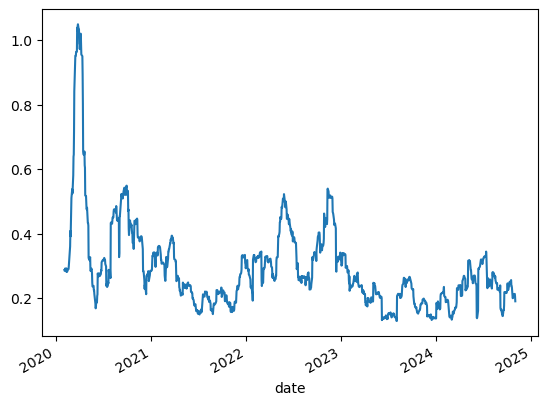

In [14]:
# looking at historical price changes, rather than just one moment, is important to get a broader picture
# we'll use the pandas rolling method for that 
(
close
    .pct_change()
    .rolling(window=22)
    .std()
    * np.sqrt(252)
).plot()

## Generating a cumulative return series